In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import mlflow

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Model Training and hyperparameter tuning

In [4]:
# Test the performance of the Model, which is loaded in the last step, on 6 data points
df_train = pd.read_csv('training_data/winequality-red.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  best quality          1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
features = df_train.drop(['best quality'], axis=1)
target = df_train['best quality']

X_train, X_test, y_train, y_test = train_test_split(
	features, target, test_size=0.2, random_state=40)

X_train.shape, X_test.shape

df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [6]:
# Data processing and Model training for Logistic Regression
solver='lbfgs'
class_weight='balanced'
model_logreg = LogisticRegression(solver=solver, multi_class ='auto', class_weight=class_weight)
model_logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='auto')

In [7]:
# Calculate predictions
train_preds = model_logreg.predict(X_train)
val_preds = model_logreg.predict(X_test)


print('Logistic Regression:')
training_accuracy = metrics.accuracy_score(y_train, train_preds)
val_accuracy=metrics.accuracy_score(y_test, val_preds)
print(f'Training Accuracy: {training_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

Logistic Regression:
Training Accuracy: 0.7334
Validation Accuracy: 0.7844


In [8]:
# Validation
y_pred = model_logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("The precision of the model: {:.2f}%".format(accuracy * 100))

The precision of the model: 78.44%


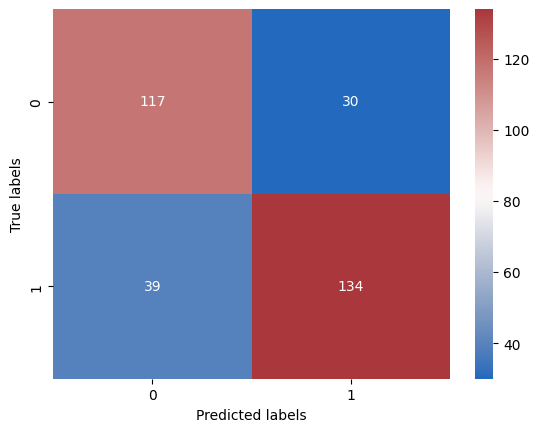

In [9]:
# Defining confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# # Visualizing confusion matrix

sb.heatmap(conf_matrix, cmap="vlag", annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [10]:
# Print the classification report for the best performing model.
print(metrics.classification_report(y_test,model_logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       147
           1       0.82      0.77      0.80       173

    accuracy                           0.78       320
   macro avg       0.78      0.79      0.78       320
weighted avg       0.79      0.78      0.78       320



In [11]:
# Test Model Performance on 6 data points
df_test = pd.read_csv('testing_data/winequality-red-test.csv')
df_test['best quality'] = [1 if x > 5 else 0 for x in df_test.quality]
#print(df_test.head())
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6 non-null      float64
 1   volatile acidity      6 non-null      float64
 2   citric acid           6 non-null      float64
 3   residual sugar        6 non-null      float64
 4   chlorides             6 non-null      float64
 5   free sulfur dioxide   6 non-null      int64  
 6   total sulfur dioxide  6 non-null      int64  
 7   density               6 non-null      float64
 8   pH                    6 non-null      float64
 9   sulphates             6 non-null      float64
 10  alcohol               6 non-null      float64
 11  quality               6 non-null      int64  
 12  best quality          6 non-null      int64  
dtypes: float64(9), int64(4)
memory usage: 752.0 bytes


In [13]:
# Prepare the test input by dropping unnecessary columns
df_test_input = df_test.drop(['quality', 'best quality'], axis=1)

# Extract the actual class for the test examples
actual_class_test = df_test['best quality']

# actual_class_test = pd.Series(df_test_actual_class)
#print(actual_class_test)

# Use the trained model to predict the class for the test input
# predicted_class_test = pd.DataFrame(model_logreg.predict(df_test_input))
predicted_class_test = pd.DataFrame(model_logreg.predict(df_test_input), columns=['Predicted Wine Quality'])

# Combine predicted and actual classes into a single DataFrame
# model_output = pd.concat([predicted_class_test, actual_class_test], axis=1, ignore_index=True)
model_output = pd.concat([predicted_class_test, actual_class_test.reset_index(drop=True)], axis=1)


# Rename columns for clarity
# model_output = model_output.set_axis(['Predicted Class', 'Actual Class'], axis='columns')
model_output.columns = ['Predicted Wine Quality', 'Actual Wine Quality']

print(model_output)


   Predicted Wine Quality  Actual Wine Quality
0                       0                    0
1                       1                    0
2                       0                    0
3                       1                    1
4                       1                    1
5                       1                    1


In [26]:
df_test_input.to_json(orient ='split')

'{"columns":["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"],"index":[0,1,2,3,4,5],"data":[[7.1,0.875,0.05,5.7,0.082,3,14,0.99808,3.4,0.52,10.2],[8.5,0.4,0.4,6.3,0.05,3,10,0.99566,3.28,0.56,12.0],[7.5,0.4,0.18,1.6,0.079,24,58,0.9965,3.34,0.58,9.4],[6.7,0.46,0.24,1.7,0.077,18,34,0.9948,3.39,0.6,10.6],[7.3,0.34,0.33,2.5,0.064,21,37,0.9952,3.35,0.77,12.1],[7.4,0.36,0.3,1.8,0.074,17,24,0.99419,3.24,0.7,11.4]]}'

In [27]:
df_test_input.to_json(orient ='values')

'[[7.1,0.875,0.05,5.7,0.082,3,14,0.99808,3.4,0.52,10.2],[8.5,0.4,0.4,6.3,0.05,3,10,0.99566,3.28,0.56,12.0],[7.5,0.4,0.18,1.6,0.079,24,58,0.9965,3.34,0.58,9.4],[6.7,0.46,0.24,1.7,0.077,18,34,0.9948,3.39,0.6,10.6],[7.3,0.34,0.33,2.5,0.064,21,37,0.9952,3.35,0.77,12.1],[7.4,0.36,0.3,1.8,0.074,17,24,0.99419,3.24,0.7,11.4]]'

In [14]:
# Store Model and its dependencies on MLFlow
mlflow.set_tracking_uri(uri="http://mlflow-mlflow.apps.cluster-db46l.dynamic.redhatworkshops.io/")
mlflow.set_experiment("test test test")
with mlflow.start_run():
    
    # store model's parameters
    mlflow.log_param("solver", solver)
    mlflow.log_param("class_weight", class_weight)
    
    # store model's metrices
    mlflow.log_metric("Training Accuracy", training_accuracy)
    mlflow.log_metric("Validation Accuracy", val_accuracy)

    # store model
    mlflow.sklearn.log_model(
        sk_model=model_logreg,
        artifact_path="model_logreg",
        registered_model_name="ElasticnetWineModel",
    )

2025/01/27 13:09:34 INFO mlflow.tracking.fluent: Experiment with name 'test test test' does not exist. Creating a new experiment.
2025/01/27 13:09:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'ElasticnetWineModel'.
2025/01/27 13:09:58 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: ElasticnetWineModel, version 1
Created version '1' of model 'ElasticnetWineModel'.


🏃 View run big-ant-210 at: http://mlflow-mlflow.apps.cluster-db46l.dynamic.redhatworkshops.io/#/experiments/1/runs/db82335cd35e4172901a4e1ac632d494
🧪 View experiment at: http://mlflow-mlflow.apps.cluster-db46l.dynamic.redhatworkshops.io/#/experiments/1
